<a href="https://colab.research.google.com/github/AzadMahmud/AI-Lab/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Flatten, Input,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_classes = 10
inputs = Input((28,28,1))
x = Conv2D(filters = 32, kernel_size = (3,3),activation="relu")(inputs)
x = Conv2D(filters = 16, kernel_size = (3,3),activation="relu")(x)
x = Conv2D(filters = 8, kernel_size = (3,3),activation="relu")(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(16,activation = "relu")(x)
outputs = Dense(num_classes,activation='softmax')(x)
model = Model (inputs,outputs)
model.summary(show_trainable="True")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 28, 28, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d (Conv2D)             │ (None, 26, 26, 32)    │        320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_1 (Conv2D)           │ (None, 24, 24, 16)    │      4,624 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_2 (Conv2D)           │ (None, 22, 22, 8)     │      1,160 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 3872)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 64)            │    247,872 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 16)            │      1,040 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 10)            │        170 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 255,186 (996.82 KB)

 Trainable params: 255,186 (996.82 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
(X_train, y_train),(X_test, y_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']

)

In [5]:
history = model.fit(
    X_train,
    y_train,
    epochs = 20,
    batch_size = 64,
    validation_split = 0.2
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.1647 - loss: 3.2335 - val_accuracy: 0.3016 - val_loss: 1.8038
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 72s 75ms/step - accuracy: 0.3187 - loss: 1.7415 - val_accuracy: 0.5922 - val_loss: 1.1083
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.6930 - loss: 0.8611 - val_accuracy: 0.8740 - val_loss: 0.4120
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - accuracy: 0.8871 - loss: 0.3471 - val_accuracy: 0.9516 - val_loss: 0.2578
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.9671 - loss: 0.1429 - val_accuracy: 0.9708 - val_loss: 0.1100
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.9839 - loss: 0.0585 - val_accuracy: 0.9779 - val_loss: 0.0850
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.9881 - loss: 0.0401 - val_accuracy: 0.9792 - val_loss: 0.0884
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9933 - loss: 0.0231 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy: 0.9793


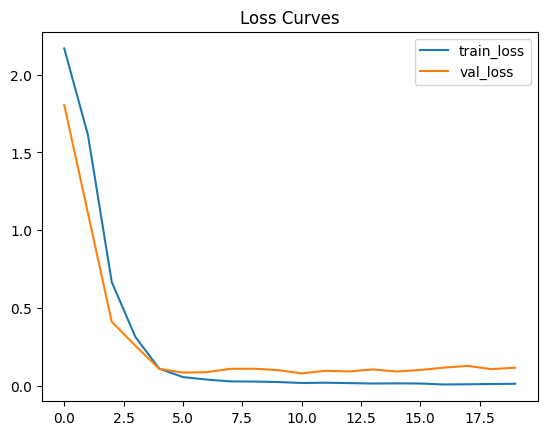

In [6]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", float(acc))

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


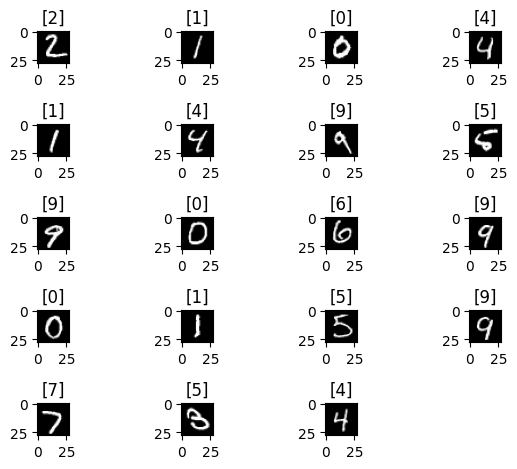

In [7]:
for i in range (1,20):
  plt.subplot(5,4,i)
  p = model.predict(X_test[i].reshape(1,28,28)).argmax(axis=1)
  plt.title(p)
  plt.imshow(X_test[i],cmap="gray")
  plt.tight_layout()
plt.show()